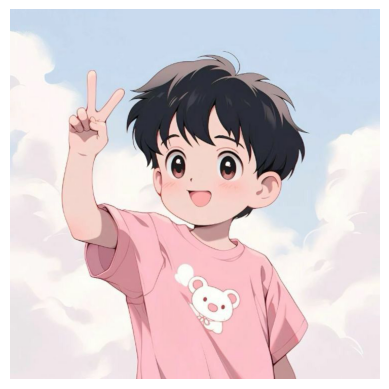

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('boy.jpg')
rimage=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(rimage)
plt.axis('off')
plt.show()

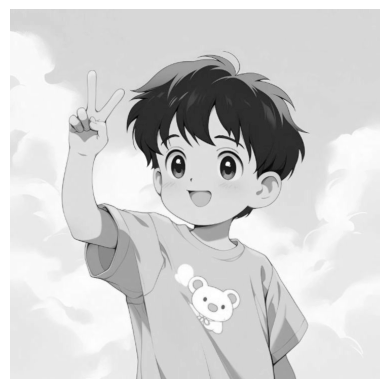

In [2]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')
plt.axis('off')  
plt.show()


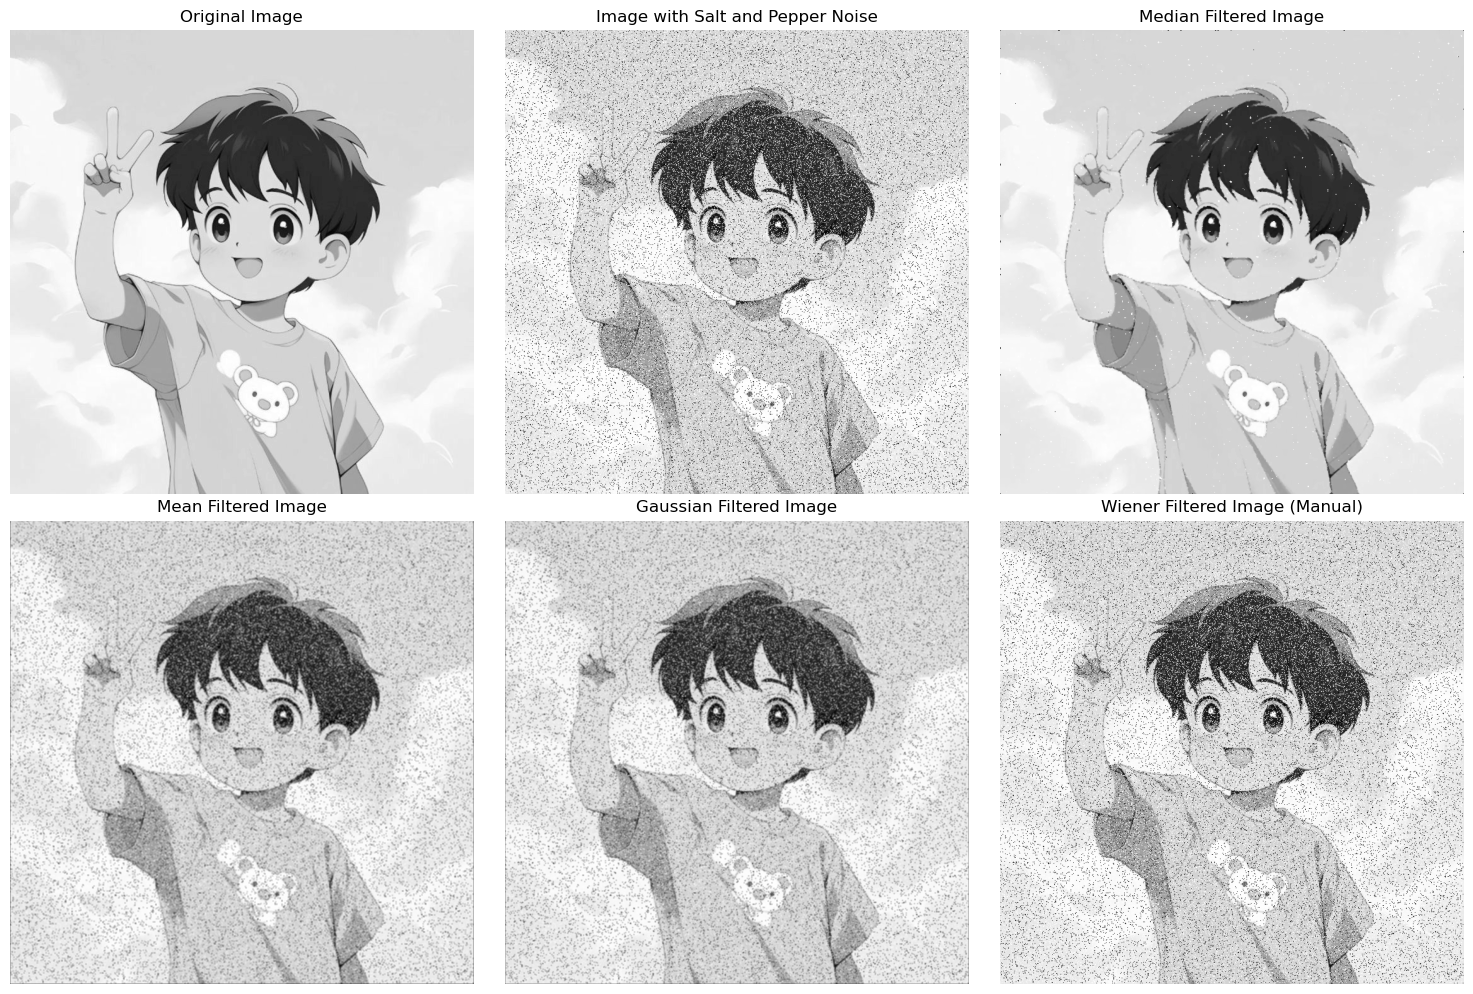

In [3]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    num_salt = int(np.ceil(salt_prob * image.size))
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255 
    num_pepper = int(np.ceil(pepper_prob * image.size))
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0  
    return noisy_image

def apply_median_filter(image, kernel_size=3):
    height, width = image.shape
    pad = kernel_size // 2
    filtered_image = np.zeros_like(image)
    padded_image = np.pad(image, pad_width=((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    for i in range(height):
        for j in range(width):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            filtered_image[i, j] = np.median(region)
    return filtered_image

def apply_mean_filter(image, kernel_size=3):
    height, width = image.shape
    pad = kernel_size // 2
    filtered_image = np.zeros_like(image)
    padded_image = np.pad(image, pad_width=((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    for i in range(height):
        for j in range(width):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            filtered_image[i, j] = np.mean(region)
    return filtered_image

def apply_gaussian_filter(image, kernel_size=3, sigma=1):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * np.exp(-((x - (kernel_size // 2))**2 + (y - (kernel_size // 2))**2) / (2 * sigma**2)),
        (kernel_size, kernel_size)
    )
    kernel /= np.sum(kernel) 
    height, width = image.shape
    pad = kernel_size // 2
    filtered_image = np.zeros_like(image)
    padded_image = np.pad(image, pad_width=((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    for i in range(height):
        for j in range(width):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            filtered_image[i, j] = np.sum(region * kernel)
    return filtered_image
    
def wiener_filter(image, kernel_size=3, noise_var=0.1):
    height, width = image.shape
    pad = kernel_size // 2
    filtered_image = np.zeros_like(image)
    padded_image = np.pad(image, pad_width=((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    for i in range(height):
        for j in range(width):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            local_mean = np.mean(region)
            local_variance = np.var(region)
            wiener_response = local_variance / (local_variance + noise_var)
            filtered_pixel = local_mean + wiener_response * (image[i, j] - local_mean)
            filtered_image[i, j] = filtered_pixel
    return filtered_image
    
image_path = 'boy.jpg'  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
salt_prob = 0.15  
pepper_prob = 0.05  
noisy_image = add_salt_and_pepper_noise(image, salt_prob, pepper_prob)

median_filtered_image = apply_median_filter(noisy_image, kernel_size=3)
mean_filtered_image = apply_mean_filter(noisy_image, kernel_size=3)
gaussian_filtered_image = apply_gaussian_filter(noisy_image, kernel_size=3, sigma=1)
wiener_filtered_image = wiener_filter(noisy_image, kernel_size=3, noise_var=0.1)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Image with Salt and Pepper Noise")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(median_filtered_image, cmap='gray')
plt.title("Median Filtered Image")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(mean_filtered_image, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title("Gaussian Filtered Image")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(wiener_filtered_image, cmap='gray')
plt.title("Wiener Filtered Image (Manual)")
plt.axis("off")

plt.tight_layout()
plt.show()


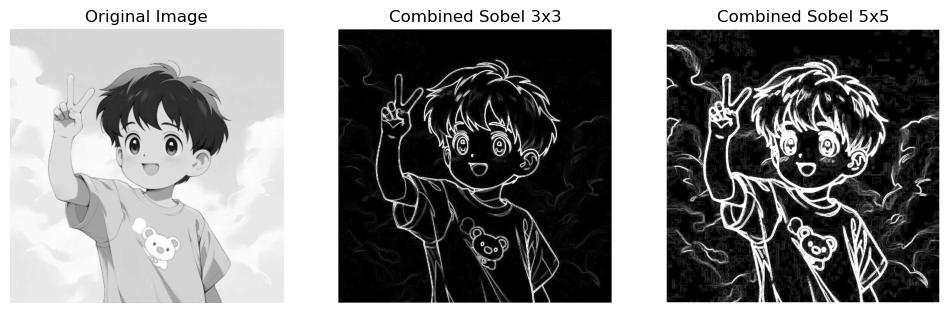

In [4]:
def sobel_filter_manual(image, kernel):
    image = image.astype(np.float32)
    height, width = image.shape
    kernel_size = kernel.shape[0]
    padding = kernel_size // 2
    padded_img = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
    output = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            region = padded_img[i:i + kernel_size, j:j + kernel_size]
            if region.shape == kernel.shape:
                output[i, j] = np.sum(region * kernel)
    return output

def combine_sobel(sobel_x, sobel_y): 
    return np.sqrt(sobel_x**2 + sobel_y**2)

def display_images(images, titles):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis("off")
    plt.show()

image_path = "boy.jpg"
gray_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

sobel_kernel_x_3x3 = np.array([[-1, 0, 1],
                               [-2, 0, 2],
                               [-1, 0, 1]])

sobel_kernel_y_3x3 = np.array([[-1, -2, -1],
                               [0, 0, 0],
                               [1, 2, 1]])

sobel_kernel_x_5x5 = np.array([[-1, -2, 0, 2, 1],
                               [-2, -3, 0, 3, 2],
                               [-3, -5, 0, 5, 3],
                               [-2, -3, 0, 3, 2],
                               [-1, -2, 0, 2, 1]])

sobel_kernel_y_5x5 = np.array([[-1, -2, -3, -2, -1],
                               [-2, -3, -5, -3, -2],
                               [0, 0, 0, 0, 0],
                               [2, 3, 5, 3, 2],
                               [1, 2, 3, 2, 1]])


sobel_x_3x3 = sobel_filter_manual(gray_img, sobel_kernel_x_3x3)
sobel_y_3x3 = sobel_filter_manual(gray_img, sobel_kernel_y_3x3)
combined_3x3 = combine_sobel(sobel_x_3x3, sobel_y_3x3)

sobel_x_5x5 = sobel_filter_manual(gray_img, sobel_kernel_x_5x5)
sobel_y_5x5 = sobel_filter_manual(gray_img, sobel_kernel_y_5x5)
combined_5x5 = combine_sobel(sobel_x_5x5, sobel_y_5x5)

combined_3x3 = np.clip(combined_3x3, 0, 255).astype(np.uint8)
combined_5x5 = np.clip(combined_5x5, 0, 255).astype(np.uint8)

images = [gray_img, combined_3x3, combined_5x5]
titles = ["Original Image", "Combined Sobel 3x3", "Combined Sobel 5x5"]
display_images(images, titles)


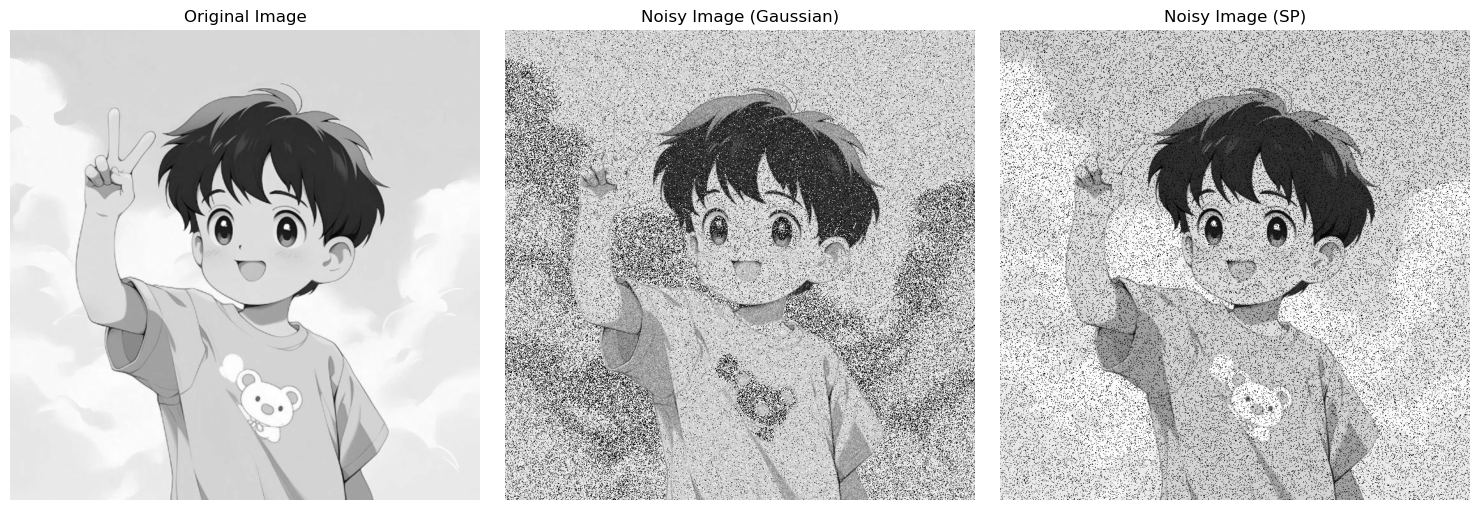

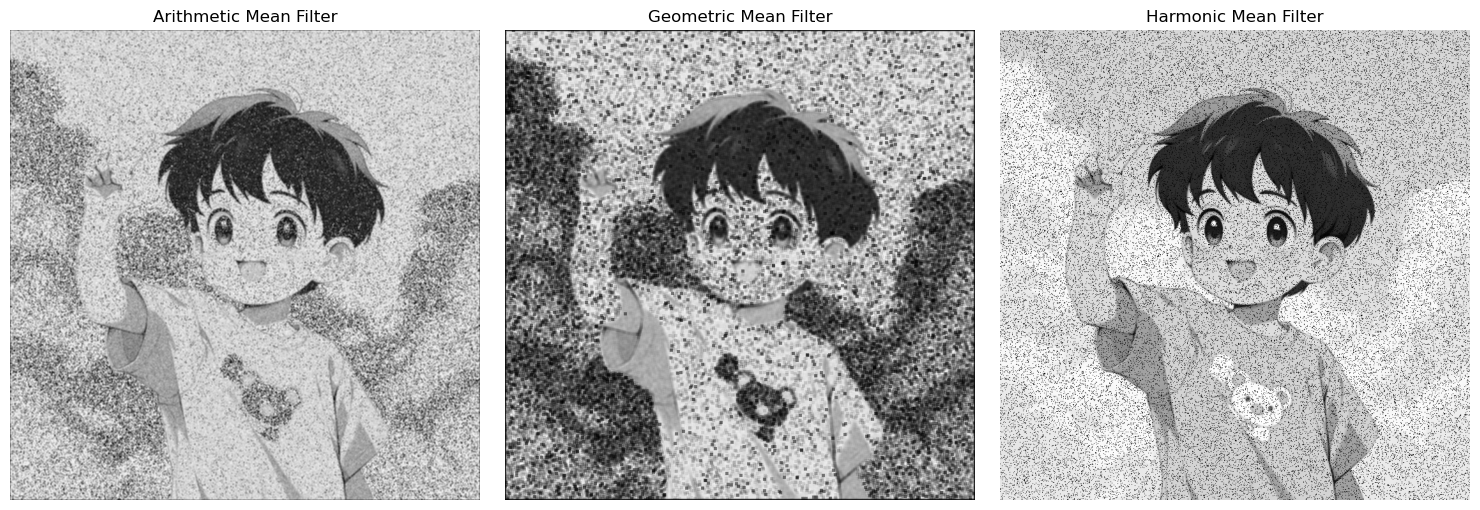

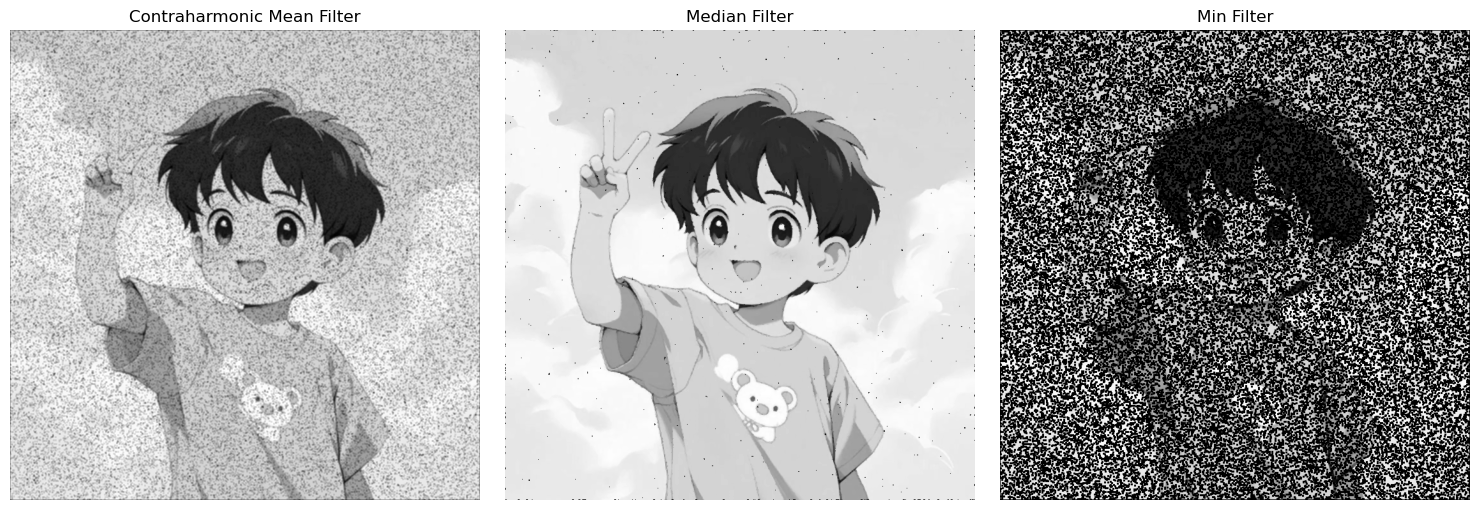

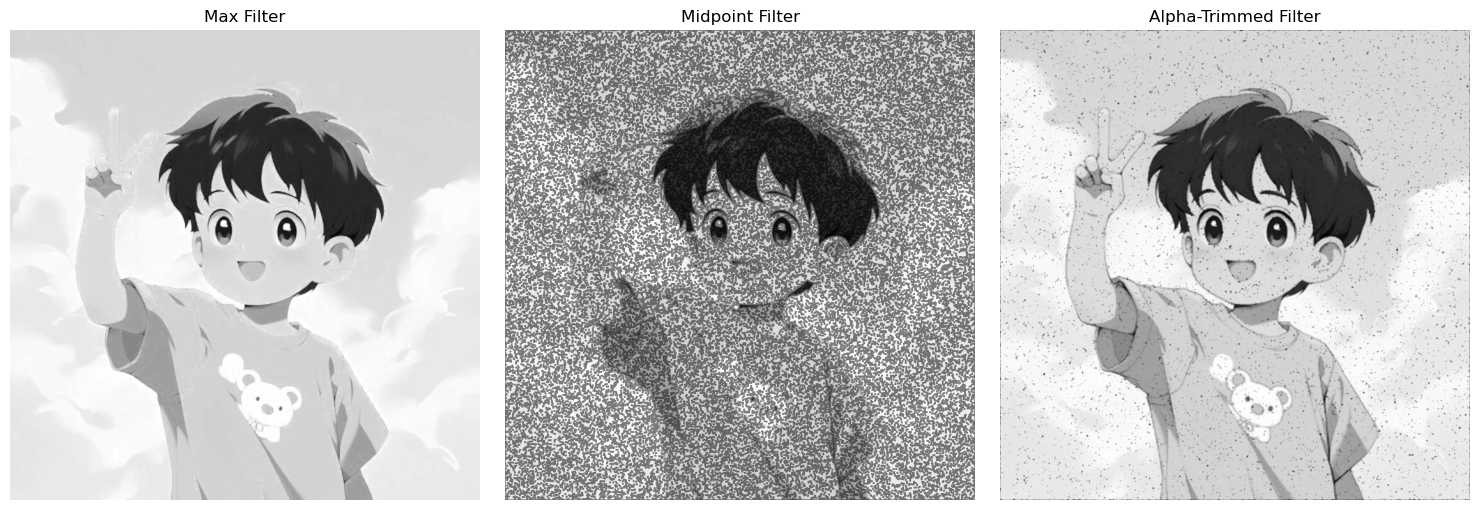

In [5]:
def arith_mean_filter(image, kernel_size=3):
    pad = kernel_size // 2
    padded_img = np.pad(image, pad, mode='constant', constant_values=0)
    filtered_img = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size]
            filtered_img[i, j] = np.mean(region)
    return filtered_img.astype(np.uint8)

def geometric_mean_filter(image, kernel_size):
    pad = kernel_size // 2
    padded_img = np.pad(image, pad, mode='constant', constant_values=1)
    filtered_img = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size] + 1e-5  
            filtered_img[i, j] = np.exp(np.mean(np.log(region)))  
    filtered_img = (filtered_img / np.max(filtered_img)) * 255
    return filtered_img.astype(np.uint8)

def harmonic_mean_filter(image, kernel_size):
    h, w = image.shape
    pad = kernel_size // 2
    filtered_image = np.zeros_like(image, dtype=np.float32)
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    for i in range(h):
        for j in range(w):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            if np.any(neighborhood == 0):
                filtered_image[i, j] = image[i, j]
            else:
                filtered_image[i, j] = (kernel_size * kernel_size) / np.sum(1.0 / (neighborhood + 1e-8))

    return np.uint8(filtered_image)

def contraharmonic_mean_filter(image, kernel_size, Q):
    h, w = image.shape
    pad = kernel_size // 2
    filtered_image = np.zeros_like(image, dtype=np.float32)
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    for i in range(h):
        for j in range(w):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size].astype(np.float32)
            num = np.sum(neighborhood ** (Q + 1))
            den = np.sum(neighborhood ** Q) + 1e-8
            filtered_image[i, j] = num / den
    return np.uint8(np.clip(filtered_image, 0, 255))

def apply_filter(image, kernel_size, filter_type, d=0):
    h, w = image.shape
    pad = kernel_size // 2
    filtered_image = np.zeros_like(image, dtype=np.float32)
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    for i in range(h):
        for j in range(w):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            if filter_type == "median":
                filtered_image[i, j] = np.median(neighborhood)
            elif filter_type == "min":
                filtered_image[i, j] = np.min(neighborhood)
            elif filter_type == "max":
                filtered_image[i, j] = np.max(neighborhood)
            elif filter_type == "midpoint":
                min_val = float(np.min(neighborhood))
                max_val = float(np.max(neighborhood))  
                filtered_image[i, j] = (min_val + max_val) / 2
            elif filter_type == "alpha_trimmed":
                sorted_vals = np.sort(neighborhood)
                trimmed_vals = sorted_vals[d: -d] if d > 0 else sorted_vals
                filtered_image[i, j] = np.mean(trimmed_vals)
    return np.uint8(np.clip(filtered_image, 0, 255))

image_path = "boy.jpg"
gray_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
gaussian_img = gray_img + np.random.normal(0, 25, gray_img.shape).astype(np.uint8)
sp_img = gray_img.copy()
sp_img[np.random.rand(*gray_img.shape) < 0.1] = 0  # Salt-and-pepper noise
filtered_img = arith_mean_filter(gaussian_img, kernel_size=3)
geometric_img = geometric_mean_filter(gaussian_img, 5)
harmonic_img = harmonic_mean_filter(sp_img, 3)
contra_harmonic_img = contraharmonic_mean_filter(sp_img, 3, Q=0)
filtered_median = apply_filter(sp_img, 3, "median")
filtered_min = apply_filter(sp_img, 3, "min")
filtered_max = apply_filter(sp_img, 3, "max")
filtered_midpoint = apply_filter(sp_img, 3, "midpoint")
filtered_alpha_trimmed = apply_filter(sp_img, 3, "alpha_trimmed", d=2)

def display_images(images, titles, cols=3):
    plt.figure(figsize=(5 * cols, 5))  
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, cols, i + 1)  
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

all_images = [
    gray_img, gaussian_img, sp_img, 
    filtered_img,geometric_img, harmonic_img,
    contra_harmonic_img, filtered_median, filtered_min,
    filtered_max, filtered_midpoint, filtered_alpha_trimmed
]

all_titles = [
    "Original Image", "Noisy Image (Gaussian)",  "Noisy Image (SP)",
    "Arithmetic Mean Filter", "Geometric Mean Filter", "Harmonic Mean Filter",
    "Contraharmonic Mean Filter", "Median Filter", "Min Filter",
    "Max Filter", "Midpoint Filter", "Alpha-Trimmed Filter"
]

for i in range(0, len(all_images), 3):
    display_images(all_images[i:i+3], all_titles[i:i+3], cols=3)
